In [1]:
from IPython.display import HTML, display
import go_nogo

In [2]:
# Train the ideal agent.
ideal_agent = go_nogo.make_agent(sigma = 0, iters = 10)
# In the output:
# i = training iteration
# t = number of ticks (1 tick = 0.05s)
# r = average reward (10 is max)
# d = average distance of the two vehicles at the time of go (in meters)
# w = frequency of waits (agent waited the other car to pass before going)
# c = frequency of collisions


i	t	r	d	w	c
0	2.01	0.55	16.51	0.0	0.47
1	3.44	1.64	16.15	0.05	0.41
2	7.53	5.59	14.71	0.31	0.19
3	9.39	7.19	15.21	0.39	0.1
4	9.38	8.17	14.7	0.41	0.05
5	10.28	6.69	13.38	0.47	0.12
6	10.96	8.8	13.82	0.51	0.01
7	9.98	8.3	15.22	0.41	0.04
8	9.76	8.12	14.33	0.43	0.05
9	19.3	7.57	14.98	0.51	0.03


In [29]:
# To keep training the agent without initializing it anew, use
go_nogo.retrain_agent(ideal_agent, iters = 10)


i	t	r	d	w	c
0	16.24	7.88	16.34	0.44	0.03
1	9.56	8.14	14.19	0.45	0.05
2	10.81	7.42	12.81	0.5	0.08
3	9.63	7.54	15.03	0.39	0.08
4	11.08	8.39	13.35	0.51	0.03
5	9.12	7.99	14.82	0.41	0.06
6	10.0	7.9	13.78	0.43	0.06
7	11.48	8.55	13.76	0.49	0.02
8	9.56	8.74	13.85	0.47	0.02
9	8.89	8.61	14.49	0.44	0.03


(1, 10.0, 16.556456444541507, 0, 0)


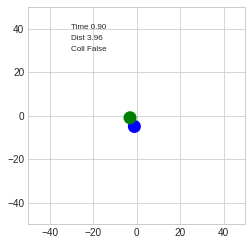

In [13]:
# Let's investigate if it has found a policy for the different distances.
# Keep an eye on the "critical" y_start at around -13.
HTML(go_nogo.animate_agent(ideal_agent, y_start = -13.8, get_anim = True).to_jshtml())

In [9]:
# Train more in the critical y_start area.
go_nogo.retrain_agent(ideal_agent, y_range = [-12,-14], iters = 5)


i	t	r	d	w	c
0	27.15	7.39	7.78	0.81	0.0
1	34.15	6.68	5.74	1.0	0.0
2	34.1	6.69	5.74	1.0	0.0
3	33.98	6.7	5.74	1.0	0.0
4	45.78	5.52	8.5	1.0	0.0


In [3]:
# Train the noisy observer
noisy_obs_agent = go_nogo.make_agent(sigma = 0.1, iters = 10)


i	t	r	d	w	c
0	2.16	0.72	16.12	0.0	0.46
1	2.3	-0.85	15.36	0.0	0.54
2	3.43	1.29	16.16	0.02	0.43
3	5.19	3.45	15.01	0.15	0.31
4	6.36	5.14	16.23	0.22	0.22
5	10.22	5.12	13.68	0.42	0.2
6	13.6	6.95	12.37	0.55	0.09
7	11.5	7.57	13.14	0.52	0.07
8	12.6	6.87	12.73	0.53	0.1
9	10.53	8.05	14.83	0.42	0.05


(36, 6.5, 5.7315620087129995, 1, 0)


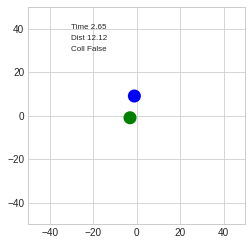

In [16]:
# Let's investigate if it has found a policy for the different distances.
# Keep an eye on the "critical" y_start at around -13.
HTML((go_nogo.animate_agent(noisy_obs_agent, y_start = -14, get_anim = True)).to_jshtml())

In [13]:
# Train more in the critical y_start area.
go_nogo.retrain_agent(noisy_obs_agent, [-12,-14], iters = 5)


i	t	r	d	w	c
0	27.41	3.76	7.78	0.8	0.12
1	33.94	6.71	5.74	1.0	0.0
2	33.99	6.7	5.74	1.0	0.0
3	34.05	6.7	5.74	1.0	0.0
4	34.11	6.69	5.74	1.0	0.0


In [28]:
# To keep training the agent without initializing it anew, use
go_nogo.retrain_agent(noisy_obs_agent, iters = 10)


i	t	r	d	w	c
0	16.92	7.01	13.7	0.52	0.07
1	10.47	7.87	15.03	0.41	0.06
2	8.1	7.9	16.13	0.32	0.07
3	10.62	7.05	14.44	0.42	0.1
4	10.6	8.25	14.3	0.46	0.04
5	11.26	7.18	13.6	0.46	0.09
6	10.76	6.65	14.78	0.39	0.12
7	9.29	7.59	14.62	0.4	0.08
8	10.87	7.23	13.46	0.46	0.09
9	12.36	6.28	13.38	0.47	0.13


In [30]:
def wait_or_go_experiment(agent, y_range, n = 100, deterministic = False):
    data = []
    agent.env.veh1_straight_start_y_range = y_range
    for i in range(n):
        _, _, _, w, c = agent.run_episode(deterministic = deterministic)
        data.append([agent.observation_var, agent.env.y_start, w, c])
    
    agent.env.veh1_straight_start_y_range = [-25,-2] # return back to original
    return data

In [31]:
# Run the experiment for both agents, collecting them into a dataframe.

import pandas as pd

data = wait_or_go_experiment(ideal_agent, y_range = [-5,-25], n = 1000, deterministic = True)
data = data + wait_or_go_experiment(noisy_obs_agent, y_range = [-5,-25], n = 500)
columns = ['sigma', 'y_start', 'wait', 'collision']
df = pd.DataFrame(data, columns=columns)

In [19]:
# Visualize individual go/no go decisions between different sigma models for various y_ranges.

import numpy as np
import matplotlib.pyplot as plt

# Note: this is a bit slow and dirty, gets slow with a lot of data. Only use for diagnosis.
def plot_data(df):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define custom colors and markers based on wait and collision values
    colors = {0: 'red', 1: 'blue'}
    markers = {0: 'o', 1: 'x'}

    # Create a dictionary to store the labels we've already added to the legend
    labels_added = {}

    for index, row in df.iterrows():
        sigma = row['sigma']
        y_start = row['y_start']
        wait = row['wait']
        collision = row['collision']
        label = f'Wait: {wait}, Collision: {collision}'

        # Add scatter plot point with custom color and marker
        ax.scatter(
            y_start,
            sigma,
            marker=markers[collision],
            color=colors[wait],
            label=label if label not in labels_added else "",
            alpha=0.7
        )
        
        # Remember that we've added this label to the legend
        labels_added[label] = True

    ax.set_xlabel('y_start')
    ax.set_ylabel('sigma')
    ax.legend(title="Wait, Collision", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Impact of y_start on wait and collision for different sigma agents')
    plt.show()

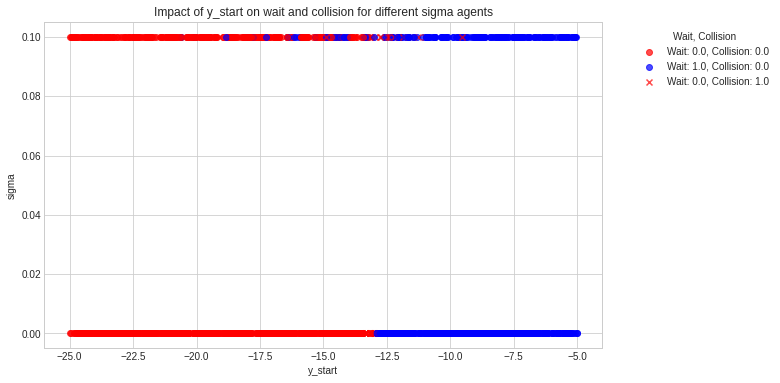

In [33]:
plot_data(df)

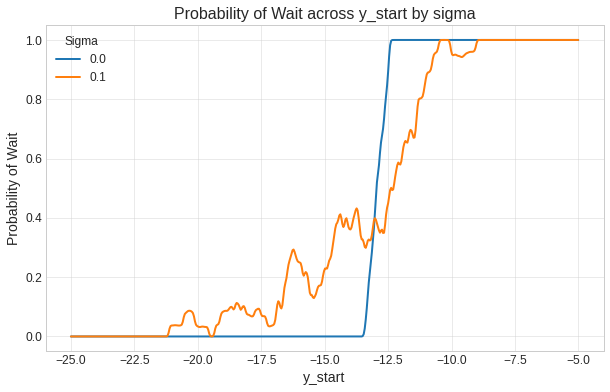

In [32]:
# Visualize the probability of go/no go as the function of y_start, between different sigmas.

# Change smoothness to larger to get less raggedy lines.
smoothness = 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def estimate_probability(df, sigma, y_start_values, window_size=1, collision = False):
    sub_df = df[df['sigma'] == sigma].sort_values('y_start')
    probabilities = []

    for y_start in y_start_values:
        window_df = sub_df[(sub_df['y_start'] >= y_start - window_size / 2) & (sub_df['y_start'] <= y_start + window_size / 2)]
        probability = window_df['collision' if collision else 'wait'].sum() / len(window_df)
        probabilities.append(probability)

    return probabilities

def smooth_probabilities(probabilities, sigma=1):
    return gaussian_filter1d(probabilities, sigma=sigma)

def plot_probability_lines(df, collision = False):
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 6))

    y_start_range = np.linspace(df['y_start'].min(), df['y_start'].max(), num=500)

    for sigma in df['sigma'].unique():
        probabilities = estimate_probability(df, sigma, y_start_range, collision = collision)
        smoothed_probabilities = smooth_probabilities(probabilities, sigma = smoothness)
        ax.plot(y_start_range, smoothed_probabilities, label=f'{sigma}', linewidth=2)

    ax.set_xlabel('y_start', fontsize=14)
    ax.set_ylabel('Probability of Wait', fontsize=14)
    ax.legend(title="Sigma", loc="upper left", fontsize=12, title_fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Probability of Wait across y_start by sigma', fontsize=16)
    plt.grid(alpha=0.5)
    plt.show()

plot_probability_lines(df)